In [3]:
### HW2 - Data Science for product management
#Erik Bacilio
#November 4, 2017

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display

In [5]:
# Loads data into data frame
df = pd.read_excel("Bank failure data.xlsx",sheetIndex=1)
# Replaces Failed during 2010Q2 for dummy 
df["Failed during 2010Q2"] = df["Failed during 2010Q2"].astype('category')
df["Failed during 2010Q2_cat"] = df["Failed during 2010Q2"].cat.codes
del df["Failed during 2010Q2"]

In [6]:
# Replaces the quartes column with integer expresion usign dictionary
df['Quarter']=df['Quarter'].replace({'2007Q4':2008,'2008Q1':2008.25,'2008Q2':2008.5,'2008Q3':2008.75,'2008Q4':2009,'2009Q1':2009.25,'2009Q2':2009.5,'2009Q3':2009.75,'2009Q4':2010,'2010Q1':2010.25})

In [7]:
# Biggest bank at the end of 2009
df_end2009=df.loc[df['Quarter'] == 2010] # 2010 -> end of 2009 start 2010
df_end2009=df_end2009.sort_values(by=['Size'], ascending=False)
print("Biggest banks measured by 'Size' at the end of 2009. Descending order")
print(df_end2009.head(3)[['Bank Name','Size']])

Biggest banks measured by 'Size' at the end of 2009. Descending order
                          Bank Name       Size
2618  Citibank (South Dakota), N.A.  99.777234
718        Huntington National Bank  92.712911
78       M&I Marshall & Ilsley Bank  92.529175


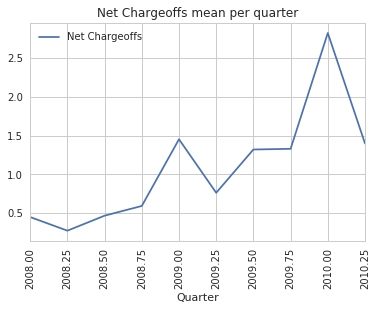

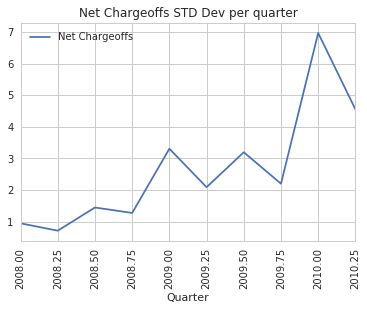

/home/k/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


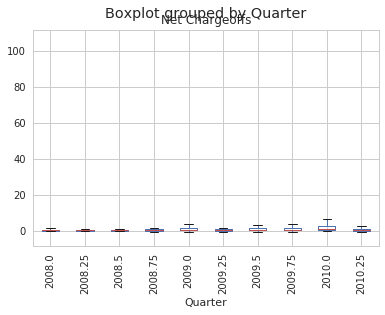

In [20]:
# Trends in Net Chargeoffs
mean_quarter = df.groupby('Quarter')[['Bank Name','Net Chargeoffs']].mean()
stddev_quarter = df.groupby('Quarter')[['Bank Name','Net Chargeoffs']].std()
from matplotlib import pyplot
mean_quarter.plot()
pyplot.title('Net Chargeoffs mean per quarter') # JUST GIVES TITLE TO THE SUBPLOT
pyplot.xticks(rotation=90)
pyplot.show()
stddev_quarter.plot() 
pyplot.title('Net Chargeoffs STD Dev per quarter') # JUST GIVES TITLE TO THE SUBPLOT
pyplot.xticks(rotation=90)
pyplot.show() # DISPLAYS THE FIGURE
boxplot_period=df.boxplot(column='Net Chargeoffs', by='Quarter')
pyplot.xticks(rotation=90)
pyplot.show()

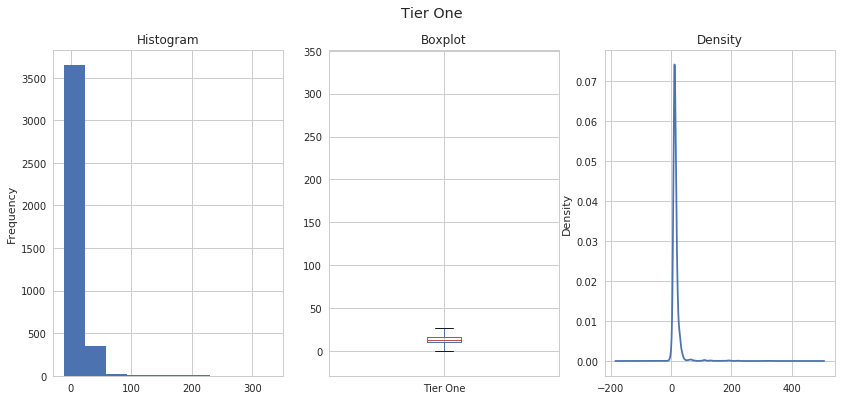

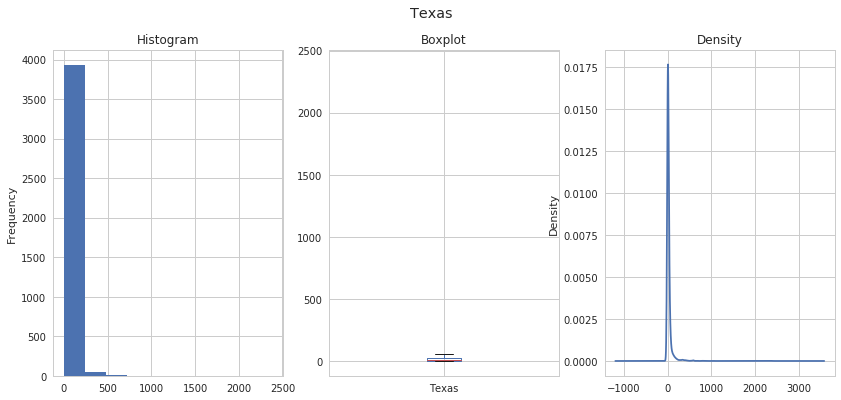

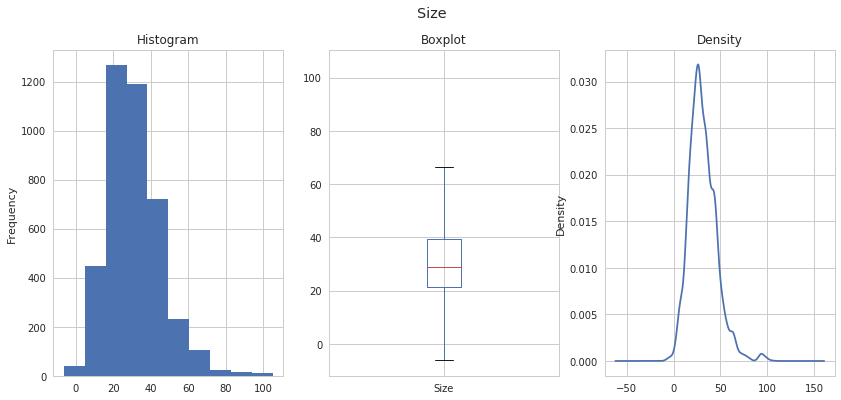

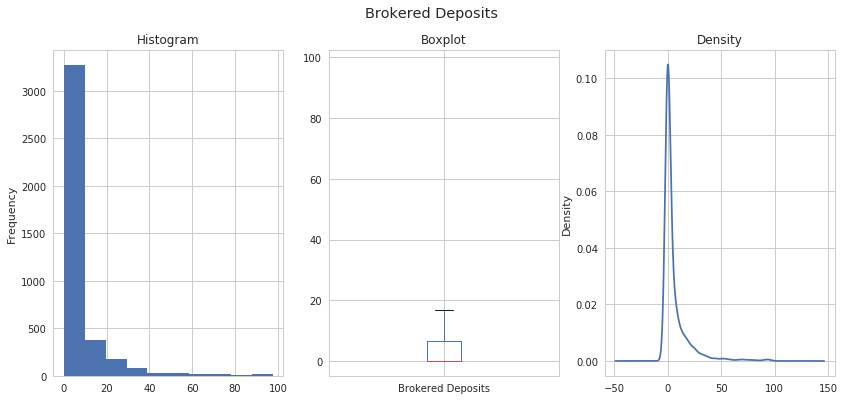

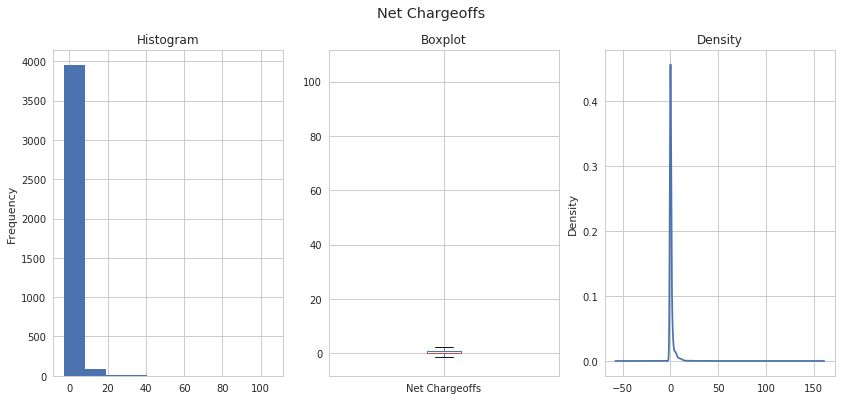

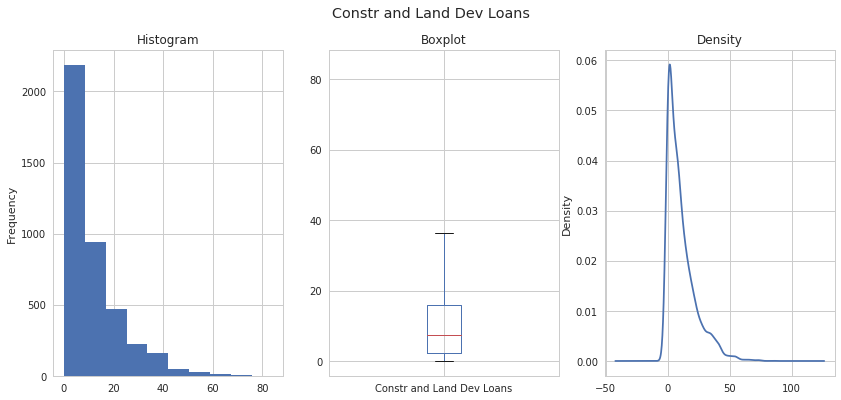

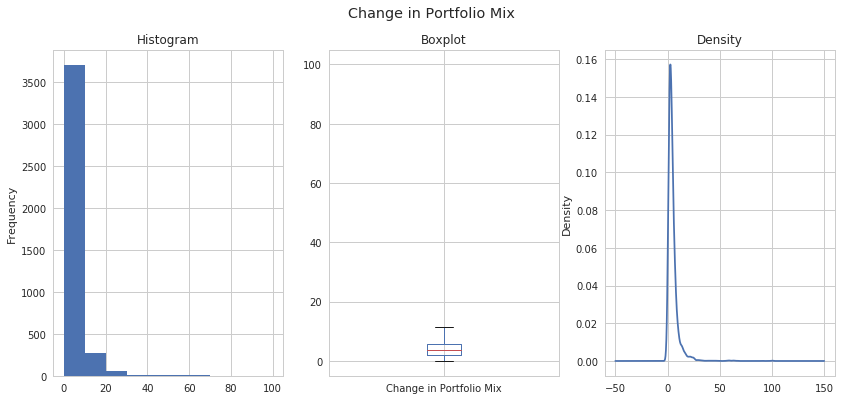

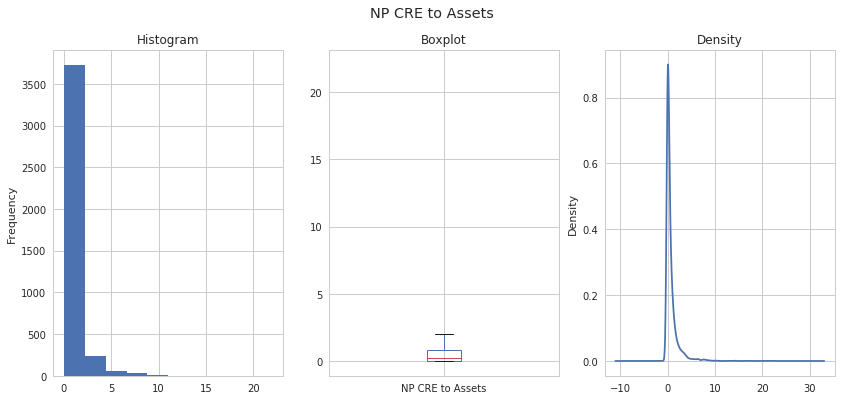

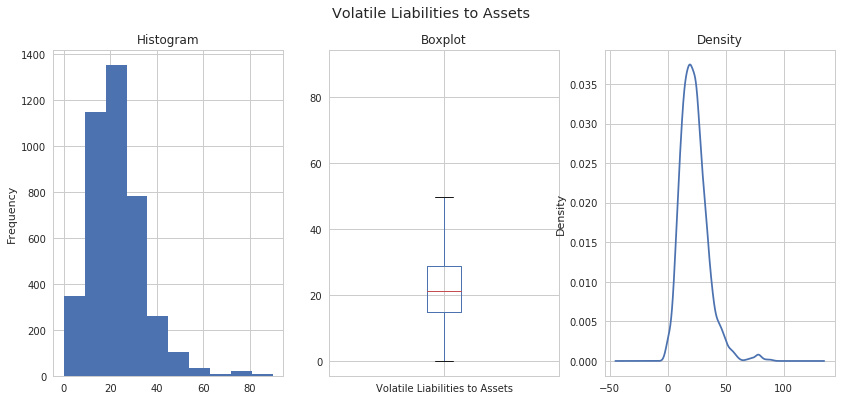

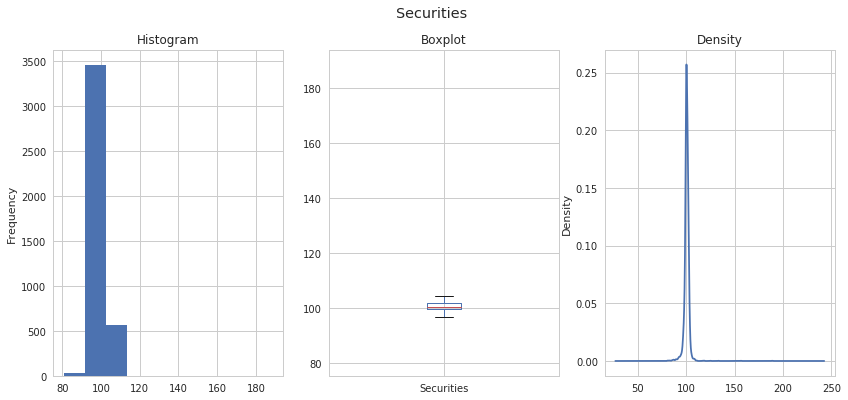

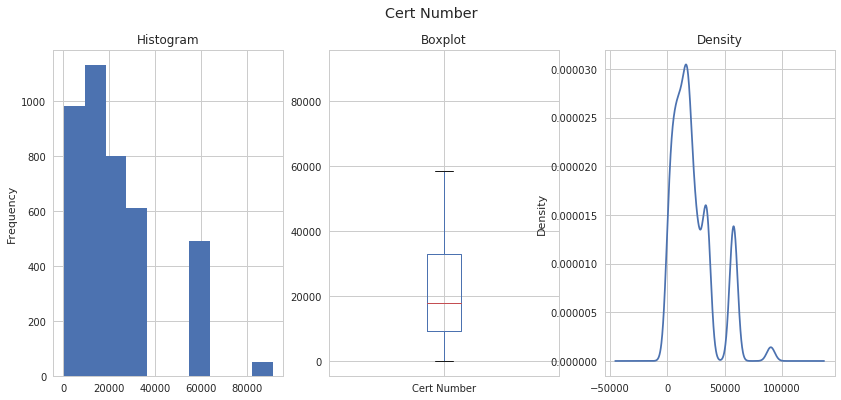

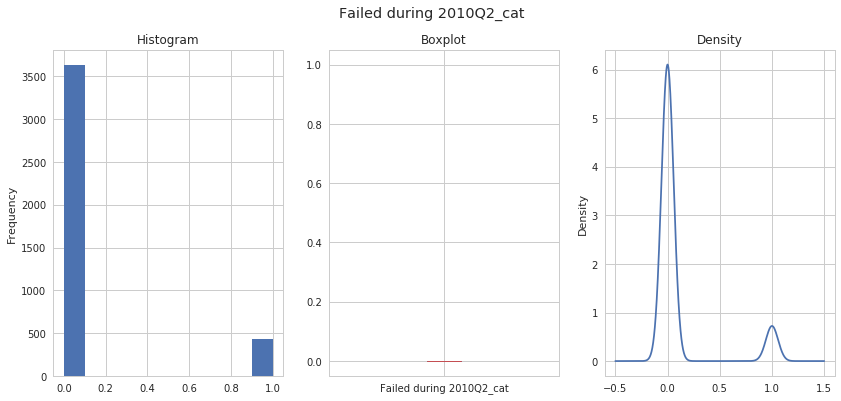

In [21]:
# Explore data
from matplotlib import pyplot
for i in df.columns[2:]:
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRNGS
        from collections import Counter # CALLS COUNTER FUNCTION
        string_counts = Counter(df[i]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
        pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIE FROM THE LIST
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE
    else:
        pyplot.figure(i, figsize=(14, 6)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
        pyplot.subplot(131) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 1
        df[i].plot.hist() # CREATES A HISTOGRAM FROM THE DATAFRAME IN MEMORY
        pyplot.title('Histogram') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.subplot(132) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 2
        df[i].plot.box() # CREATES A BOXPLOT GRAPH FROM THE DATAFRAME IN MEMORY
        pyplot.title('Boxplot') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.subplot(133) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 3
        df[i].plot.kde() # CREATES A DENSITY GRAPH FROM THE DATAFRAME IN MEMORY
        pyplot.title('Density') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE

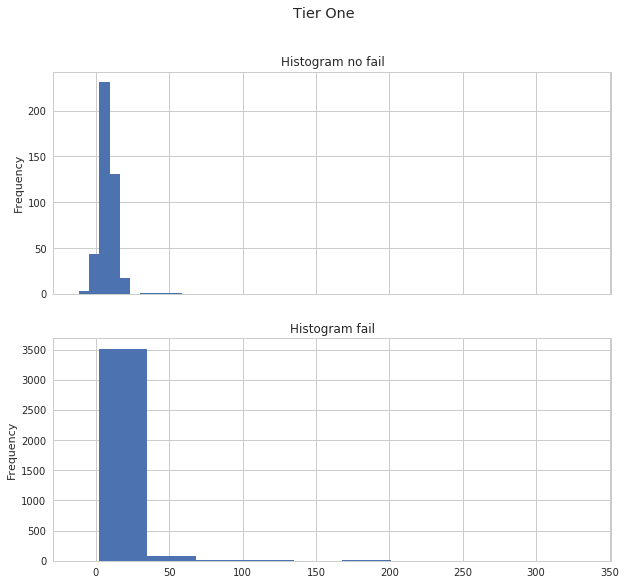

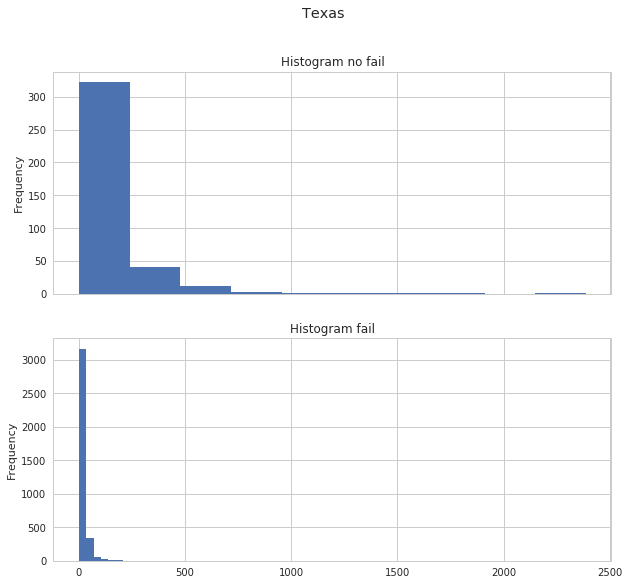

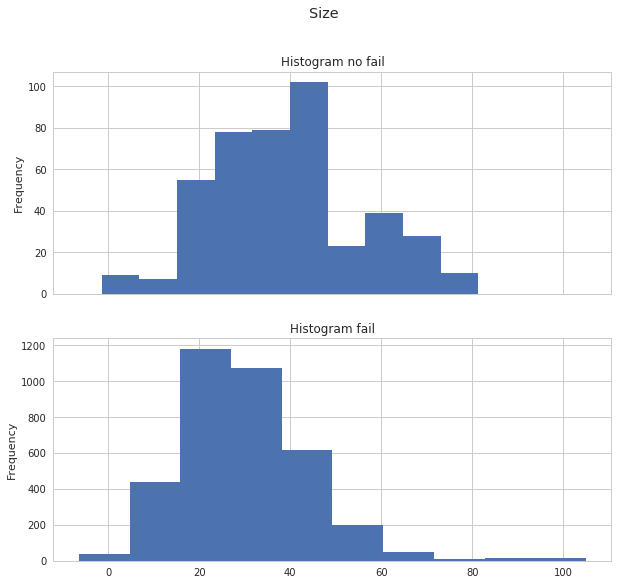

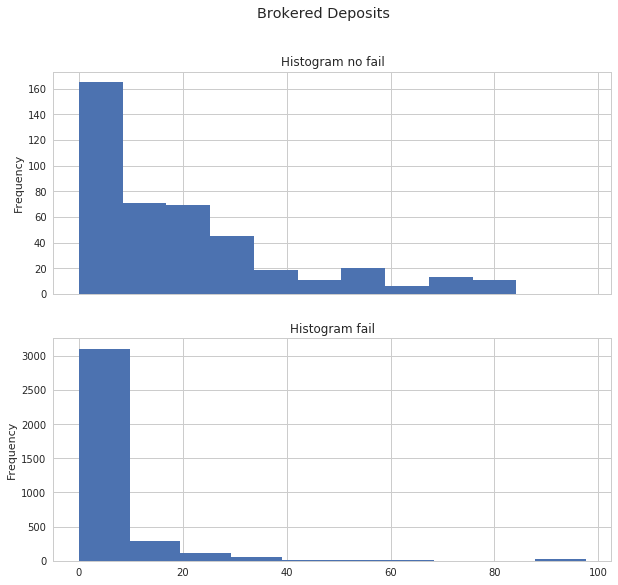

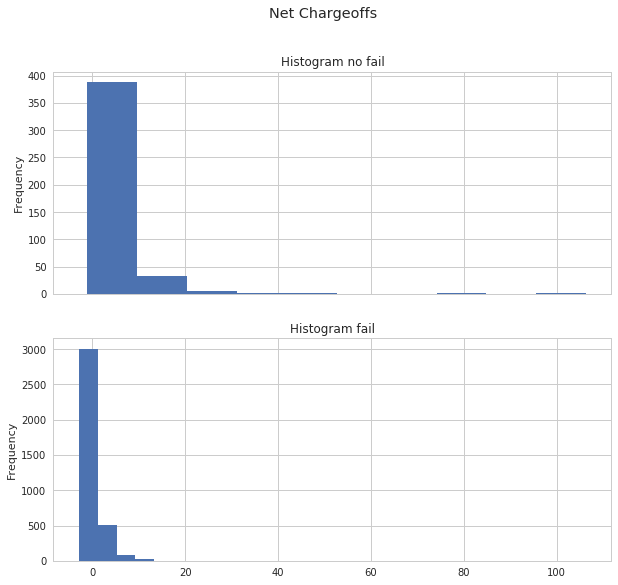

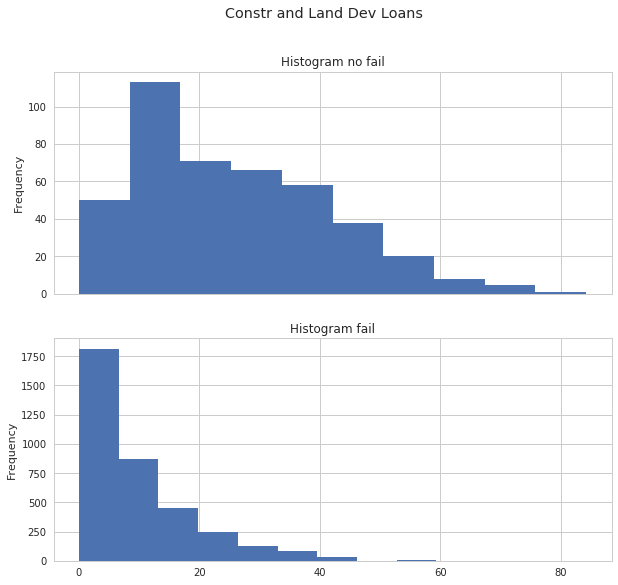

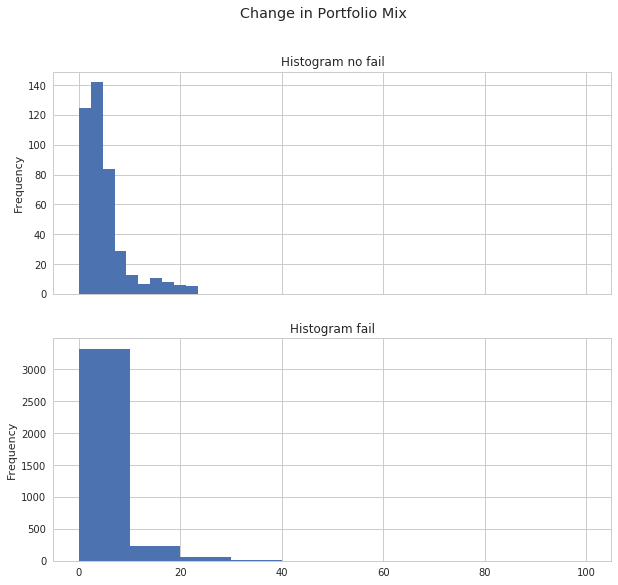

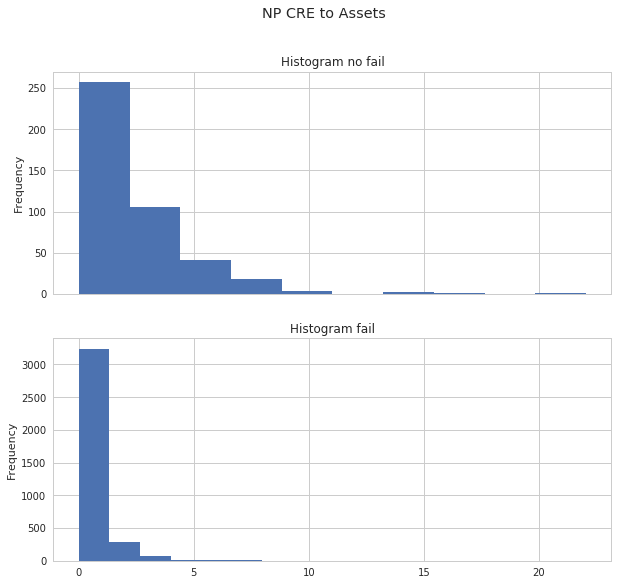

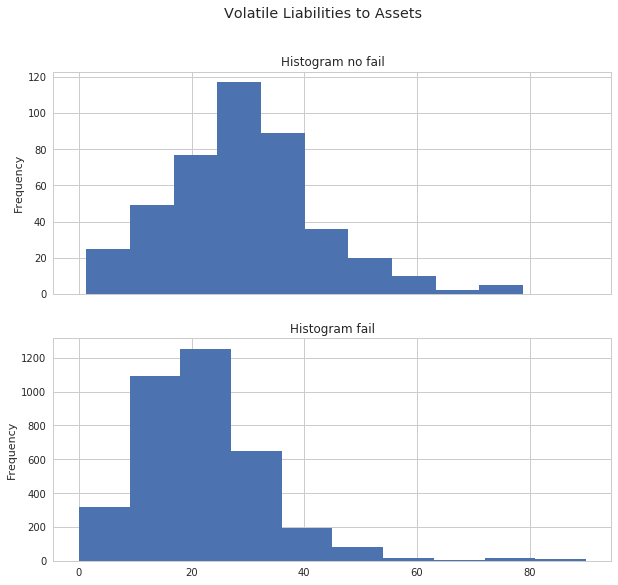

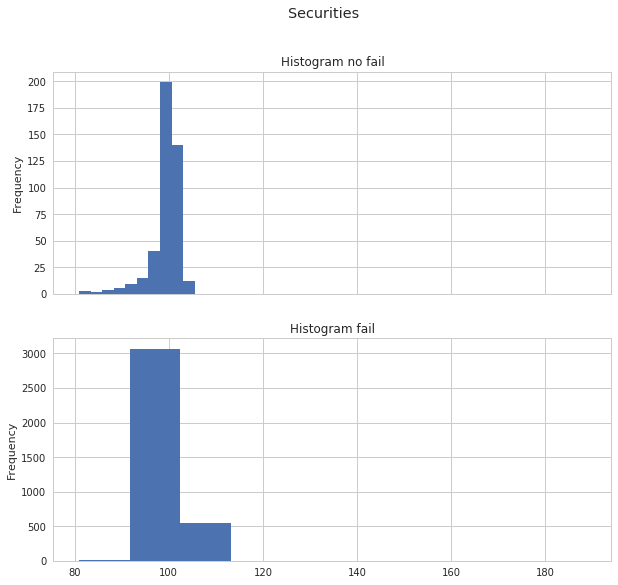

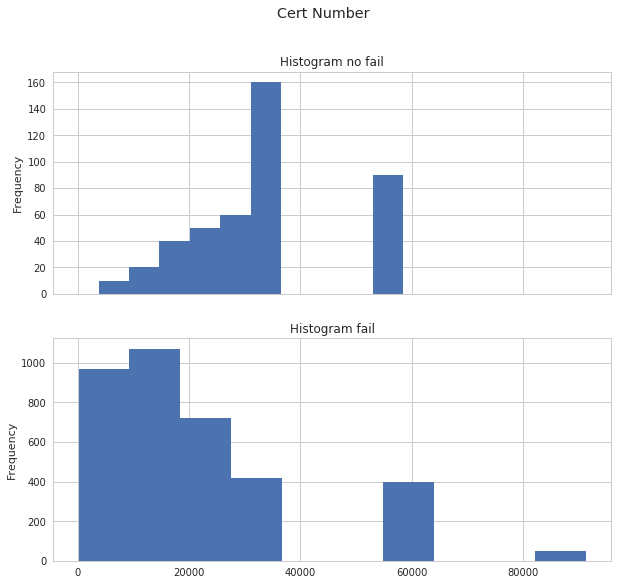

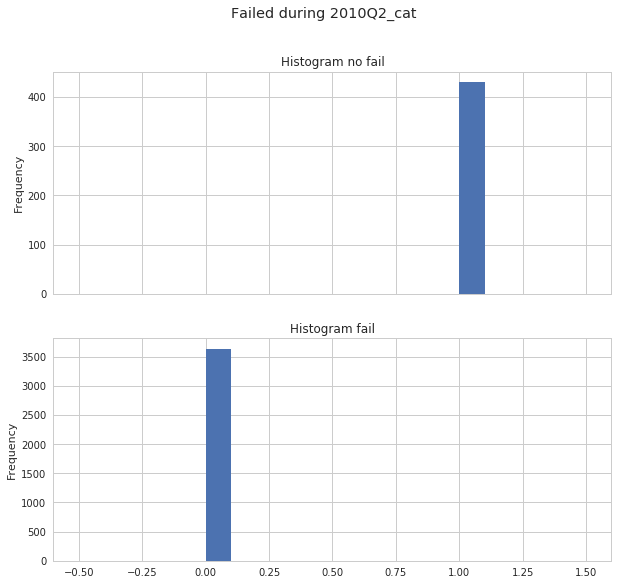

In [22]:
# compare histograms
df_sicontrol=df.loc[df['Failed during 2010Q2_cat'] == 1]
df_nocontrol=df.loc[df['Failed during 2010Q2_cat'] == 0]
from matplotlib import pyplot
for i in df_sicontrol.columns[2:]:
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRNGS
        from collections import Counter # CALLS COUNTER FUNCTION
        string_counts = Counter(df[i]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
        pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIE FROM THE LIST
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE
    else:
        pyplot.figure(i, figsize=(10, 9)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
        ax1 = pyplot.subplot(211) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 1
        df_sicontrol[i].plot.hist() # CREATES A HISTOGRAM FROM THE DATAFRAME IN MEMORY
        pyplot.title('Histogram no fail') # JUST GIVES TITLE TO THE SUBPLOT
        ax2 = pyplot.subplot(212, sharex=ax1) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 2
        df_nocontrol[i].plot.hist() # CREATES A BOXPLOT GRAPH FROM THE DATAFRAME IN MEMORY
        pyplot.title('Histogram fail') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE

In [8]:
# delete rows with null values
import numpy as np
from collections import Counter # CALLS COUNTER FUNCTION
# COUNTER FUNCTION FOR NAN VALUES IN NUMERIC VARIABLES
for i in df.columns: # LOOP THORUGH COLUMNS IN DF
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRINGS
        continue # JUMP FOR CASES OF STRING VARIABLE
    else: # BE CAREFULL!!!! IT IS MEANT FOR NUMERIC VARIABLES BUT ADDITIONAL CHECK SHOULD BE IMPLEMENTED
        types = [] # LIST HOLDING NAN INFO 
        for z in df[i]: # LOOP THOURGH ELEMENTS IN COLUMN 
            nanValidation = np.isnan(z) # CHECK IF VALUE IS NAN, VALUE IS NAN -> NAN
            types.append(nanValidation) # APPENDS RESULT TO LIST
        string_counts = Counter(types) # CREATES AN OBJECT THAT COUNTS THE REPETITIONS OF A STRING
        print(string_counts) # GIVES RESULT OF NAN VALIDATION
        
# REMOVEs ROWS IN WHICH THERE ARE NAN VALUES
for i in df.columns: # LOOP THORUGH COLUMNS IN DF
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRINGS
        continue  #JUMP FOR CASES OF STRING VARIABLE
    else: # BE CAREFULL!!!! IT IS MEANT FOR NUMERIC VARIABLES BUT ADDITIONAL CHECK SHOULD BE IMPLEMENTED
        df = df[np.isfinite(df[i])] # ONLY KEEPSROWS WITH NON-NAN VALUES IN COLUMN i

# MANUAL CHECK FOR NAN VALUES. NON NAN VALUES -> EMPTY LISTS
for i in df.columns: # LOOP THORUGH COLUMNS IN DF
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRINGS
        continue # JUMP FOR CASES OF STRING VARIABLE
    else: # BE CAREFULL!!!! IT IS MEANT FOR NUMERIC VARIABLES BUT ADDITIONAL CHECK SHOULD BE IMPLEMENTED
        missingValuesIndexList = [] # CREATES A LIST TO CONTAIN INDEXES OF ROWS WITH NAN VALUES
        counter = 0 # IS COUNTER TO IDENTIFY THE INDEX
        for z in df[i]: # LOOPS THOURGH VALUES IN COLUMN i
            nanValidation = np.isnan(z) # CHECK IF VALUE IS NAN, VALUE IS NAN -> NAN
            if nanValidation == True: # IF NAN VALUE IS FOUND
                missingValuesIndexList.append(counter) # ADDS THE INDEX TO THE LIST ABOVE DEFINED
            counter += 1 # INCREASE THE COUNTER TO THE NEXT INDEX
        print(missingValuesIndexList) # PRINTS LIST CREATED FOR THE COLUMN, NON NAN VALUES -> EMPTY LISTS

Counter({False: 4060})
Counter({False: 4060})
Counter({False: 3997, True: 63})
Counter({False: 4060})
Counter({False: 4040, True: 20})
Counter({False: 4054, True: 6})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


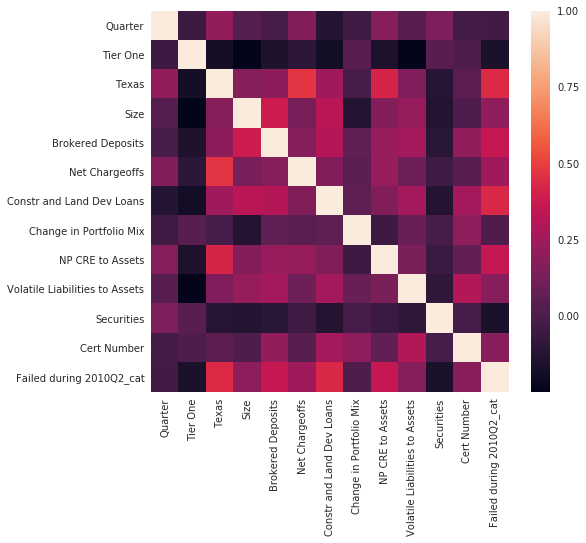

In [24]:
# create heatmap
from matplotlib import pyplot
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pyplot.figure(1, figsize=(8, 7))
sns.heatmap(df.corr())
pyplot.xticks(rotation=90)
pyplot.yticks(rotation=0)
pyplot.show()

In [9]:
# create training and testing sets
# 1) create a set of the names of the banks, 2) choose 70% BANKS training and 30% as test 3) slice the complete DF in train and test

# 1)
import random
banks = list(df['Bank Name'].unique()) # CREATES A LIST OF UNIQUE BANK NAMES IN THE DATA FRAME
banksNumber=len(banks) # RETURNS THE NUMBER OF DIFFERENT BANKS IN THE DATAFRAME
trainNumber=int(round(banksNumber*0.7,0)) # DETERMINES THE NUMBER OF BANKS USED FOR TRAIN
testNumber=int(banksNumber-trainNumber) # DETERMINES THE NUMBER OF BAKS USED FOR TESTING 
trainIndexes=random.sample(range(banksNumber-1), trainNumber) # DETERMINES RANDOM INDEXES TO CHOOSE THE BANKS FOR TRAIN AND TESTING

# 2)
banksTrain=[]
for i in trainIndexes:
    aggregator = banks[i] # PICKS THE NAME OF THE BANK ACCORDING TO THE INDEX
    banksTrain.append(aggregator) # APPENDS THE NAME TO THE LIST
banksTest=banks
for i in banksTrain:
    banksTest.remove(i) # TEST LIST BY REMOVING THE BANK NAMES FOR TRAIN 

# 3)
trainDF = pd.DataFrame() # CREATES EMPTY DATAFRAME TO FILL!!!
for k in banksTrain:
    aggregator=df.loc[df['Bank Name'] == k] # PINKS OBSERVATIONS ACCORDING TO BANK NAME
    trainDF = trainDF.append(aggregator, ignore_index = True) # AGGREGATES DATA

testDF = pd.DataFrame() 
for k in banksTest:
    aggregator=df.loc[df['Bank Name'] == k] # PINKS OBSERVATIONS ACCORDING TO BANK NAME
    testDF = testDF.append(aggregator, ignore_index = True) # AGGREGATES DATA

In [62]:
# fit training sets
# 1) use classification 2) tune parameters 3) choose best model
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix


X_train = trainDF.loc[:,'Quarter':'Cert Number']
y_train = trainDF[df.columns[-1]]

X_test = testDF.loc[:,'Quarter':'Cert Number']
y_test = testDF[testDF.columns[-1]]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, min_samples_leaf=5, 
                                  max_depth=None, min_samples_split=3)
clf_gini.fit(X_train, y_train)

with open("clf_gini.txt", "w") as f:
    f = tree.export_graphviz(clf_gini, out_file=f)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=5, 
                                  max_depth=None, min_samples_split=3)
clf_entropy.fit(X_train, y_train)

with open("clf_entropy.txt", "w") as f:
    f = tree.export_graphviz(clf_entropy, out_file=f)

    
# y_pred = clf_gini.predict(X_train)
# y_pred_en = clf_entropy.predict(X_train)

# print(accuracy_score(y_train,y_pred)*100)

# print(accuracy_score(y_train,y_pred_en)*100)
    
    
    
y_pred = clf_gini.predict(X_test)
y_pred_en = clf_entropy.predict(X_test)

print(accuracy_score(y_test,y_pred)*100)

print(accuracy_score(y_test,y_pred_en)*100)


uno=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not fail', 'Predicted Fail'],
    index=['True Not fail', 'True fail']
)

uno['Predicted Fail'][1]

dos = pd.DataFrame(
    confusion_matrix(y_test, y_pred_en),
    columns=['Predicted Not fail', 'Predicted Fail'],
    index=['True Not fail', 'True fail']
)

87.3602751505
91.4875322442


In [ ]:
# predict bank failure for new data sample

In [1]:
#Get top 2 banks that are most likely to fail